# Setup and Libraries

We install pyxlsb, which allows us to handle Excel files in that format.

In [1]:
# Installing pyxlsb
!pip install pyxlsb

In [2]:
# Importing Relevant Libraries
import os
import pandas as pd
from pyxlsb import open_workbook
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Functions Definition

In [3]:
# Defining a Function to Read Totals from the Excel Sheet
def read_total_from_sheet(file_path, sheet_name):
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_name) as sheet:
            for i, row in enumerate(sheet.rows()):
                if i == 40:  # Locating the Total in Row 41
                    total_value = row[10].v if len(row) > 10 else None
                    return total_value
    return None

# Defining a Function to Process Multiple Weeks
def process_multiple_weeks(folder_path, sheet_names):
    all_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsb'):
            file_path = os.path.join(folder_path, file_name)
            week_date = file_name.split('_')[2]  # Extracting the Date from the Filename
            for sheet_name in sheet_names:
                total_value = read_total_from_sheet(file_path, sheet_name)
                if total_value is not None:
                    all_data.append({
                        'Sheet Name': sheet_name,
                        'Total': total_value,
                        'Week Date': week_date,
                        'Session': 'Lunch' if 'L-' in sheet_name else 'Dinner'
                    })
                else:
                    print(f'Warning: No data found for {sheet_name} in {file_name}')
    return pd.DataFrame(all_data)

# Data Processing

In [4]:
# Running the Function with the Path to the Folder Containing the Files
folder_path = '/content/drive/MyDrive/weekly_sheets'
sheet_names = ['L-Sat', 'D-Sat', 'L-Sun', 'L-Wed', 'D-Wed', 'L-Thu', 'D-Thu', 'L-Fri', 'D-Fri']
df_all_weeks = process_multiple_weeks(folder_path, sheet_names)

# Sorting the DataFrame by 'Week Date' Column
df_all_weeks = df_all_weeks.sort_values(by='Week Date')

# Convert 'Total' column to numeric, handling non-numeric values
df_all_weeks['Total'] = pd.to_numeric(df_all_weeks['Total'], errors='coerce')

# Removing the '.xlsb' Extension from the 'Week Date' Column
df_all_weeks['Week Date'] = df_all_weeks['Week Date'].str.replace('.xlsb', '', regex=False)

# Converting the 'Week Date' Column to Date Format
df_all_weeks['Week Date'] = pd.to_datetime(df_all_weeks['Week Date'], format='%Y%m%d')

# Verifying the Results
print(df_all_weeks.head())

    Sheet Name     Total  Week Date Session
738      L-Sat   2964.55 2022-04-22   Lunch
739      D-Sat   3685.75 2022-04-22  Dinner
740      L-Sun  11047.95 2022-04-22   Lunch
741      L-Wed   1514.35 2022-04-22   Lunch
742      D-Wed   2224.95 2022-04-22  Dinner


In [5]:
# Adding Year and Month Columns
df_all_weeks['Year'] = df_all_weeks['Week Date'].dt.year
df_all_weeks['Month'] = df_all_weeks['Week Date'].dt.to_period('M')

# Converting the 'Month' Column to String to Avoid Errors with Seaborn
df_all_weeks['Month'] = df_all_weeks['Month'].astype(str)

# Visualisation

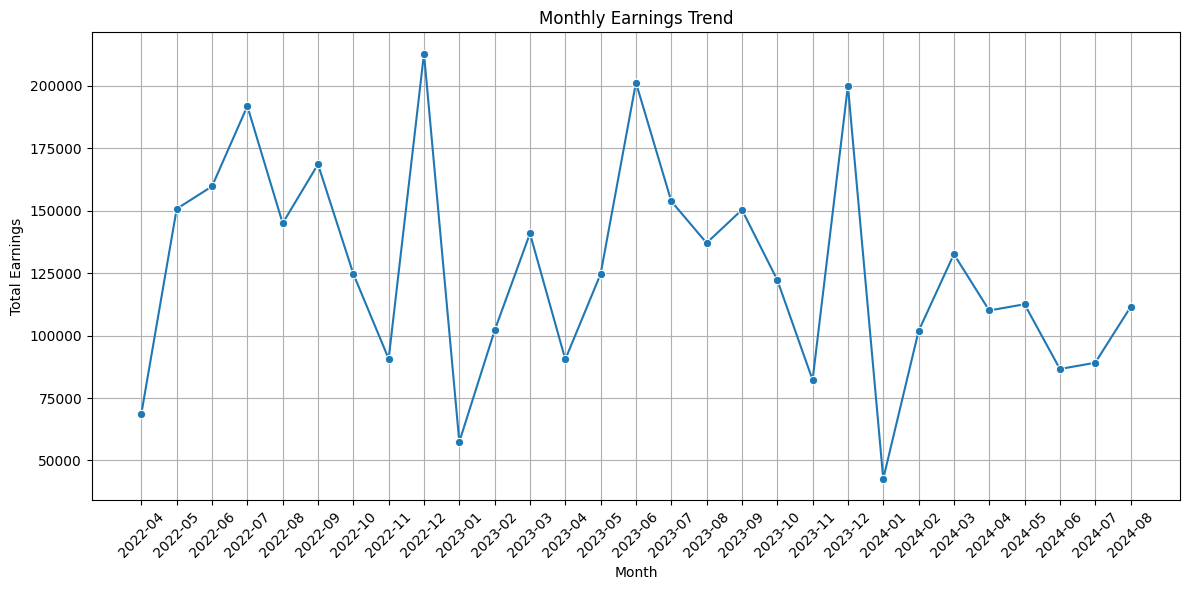

In [6]:
# Monthly Revenue Chart
monthly_earnings = df_all_weeks.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_earnings, x='Month', y='Total', marker='o')
plt.title('Monthly Earnings Trend')
plt.xlabel('Month')
plt.ylabel('Total Earnings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The 'Monthly Earnings Trend' graph shows total earnings from April 2022 to August 2024. Significant variability is observed, with peaks likely linked to seasonal factors or specific high-earning dates like Christmas. This monthly variability should be considered when analysing trends and making informed business decisions.

In [7]:
# Identifying Top Performing Months
top_months = monthly_earnings.sort_values(by='Total', ascending=False).head(5)
print("Top 5 Performing Months:\n", top_months)

Top 5 Performing Months:
       Month        Total
8   2022-12  212885.1500
14  2023-06  201252.2500
20  2023-12  199989.3000
3   2022-07  191867.5300
5   2022-09  168568.6511


This analysis identifies the top-performing months, providing insights into seasonal trends or events that consistently drive higher earnings. This could inform future strategic decisions, such as staffing or marketing during these periods.

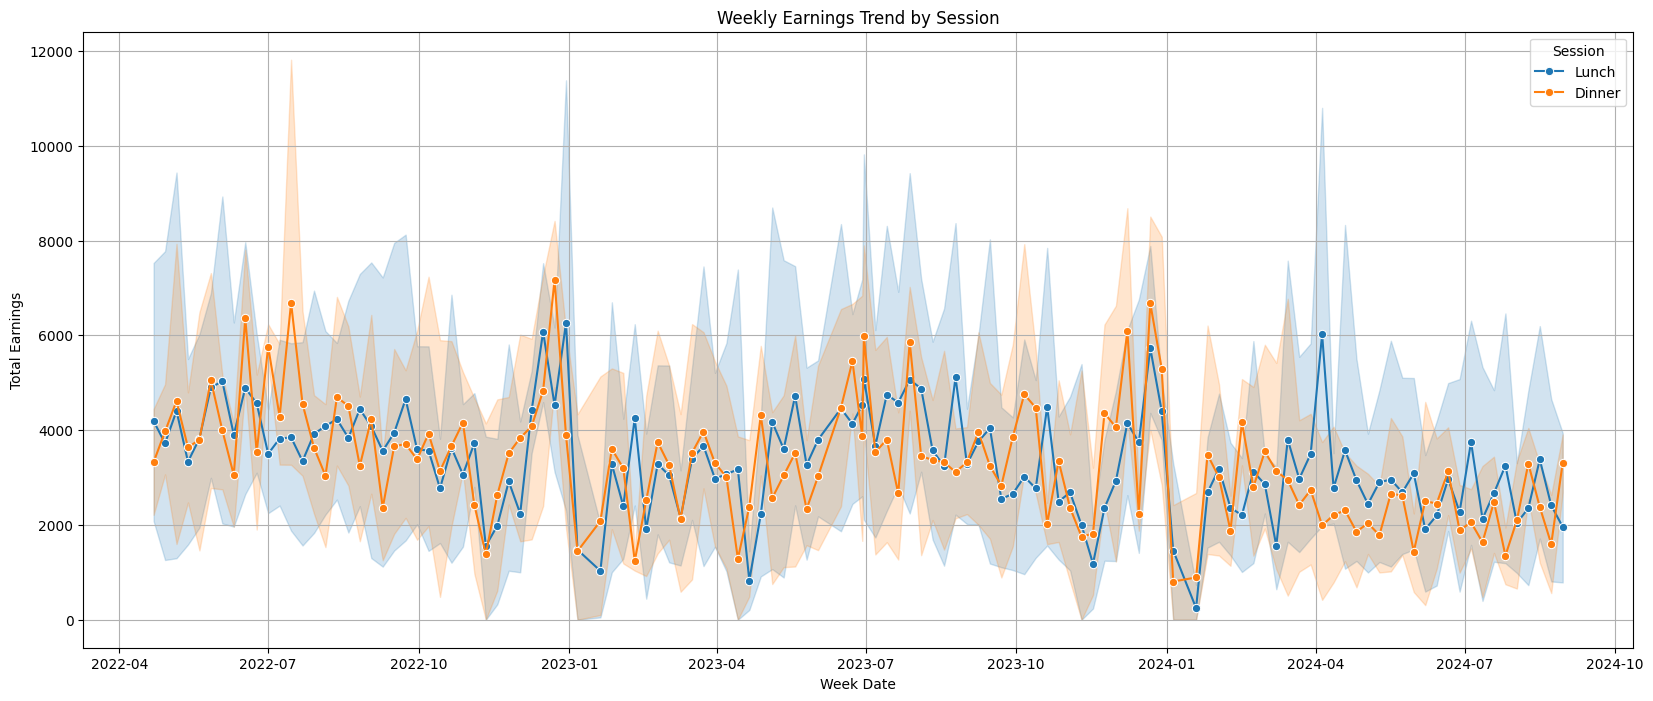

In [8]:
# Weekly Revenue Trends
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_all_weeks, x='Week Date', y='Total', hue='Session', marker='o')
plt.title('Weekly Earnings Trend by Session')
plt.xlabel('Week Date')
plt.ylabel('Total Earnings')
plt.grid(True)
plt.show()

The weekly earnings trend graph compares ‘Lunch’ and ‘Dinner’ sessions from April 2022 to August 2024. Despite higher weekly earnings typically seen in ‘Dinner’ sessions, the total earnings for ‘Lunch’ sessions surpass those of ‘Dinner’. This may be due to ‘Lunch’ having more operational days or specific high-earning weeks. Investigating these peak weeks further could clarify the underlying reasons.

In [9]:
# Highlighting Weeks with Unusually High or Low Earnings
threshold = df_all_weeks['Total'].mean() + 2 * df_all_weeks['Total'].std()
high_earning_weeks = df_all_weeks[df_all_weeks['Total'] > threshold]
print("Weeks with Exceptionally High Earnings:\n", high_earning_weeks[['Week Date', 'Total', 'Session']])

Weeks with Exceptionally High Earnings:
       Week Date     Total Session
740  2022-04-22  11047.95   Lunch
749  2022-04-29  11815.85   Lunch
760  2022-05-06   9595.40  Dinner
758  2022-05-06  14035.40   Lunch
785  2022-05-27   9180.30   Lunch
794  2022-06-03  12167.30   Lunch
821  2022-06-17  10290.55   Lunch
861  2022-07-15  14382.60  Dinner
866  2022-07-29   9768.15   Lunch
884  2022-08-19   9283.60   Lunch
902  2022-08-26   9904.30   Lunch
911  2022-09-02  10120.50   Lunch
920  2022-09-09  10853.25   Lunch
929  2022-09-16  11851.60   Lunch
938  2022-09-23  10505.55   Lunch
955  2022-10-07   8851.00  Dinner
974  2022-10-21   9828.80   Lunch
1055 2022-12-30  15665.25   Lunch
299  2023-01-27  10211.10   Lunch
344  2023-03-24  10959.80   Lunch
416  2023-04-14  10538.35   Lunch
425  2023-05-05  12449.10   Lunch
452  2023-05-12  11819.70   Lunch
443  2023-05-19   9536.35   Lunch
497  2023-06-16  11875.40   Lunch
461  2023-06-29   9679.75   Lunch
479  2023-06-30  14769.50   Lunch
506  20

This analysis flags weeks with unusually high earnings, which could correlate with special events, promotions, or other external factors. Understanding these peaks helps in replicating successful strategies in future periods.

<ipython-input-10-dd4772b14054>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_earnings, x='Year', y='Total', palette='viridis')


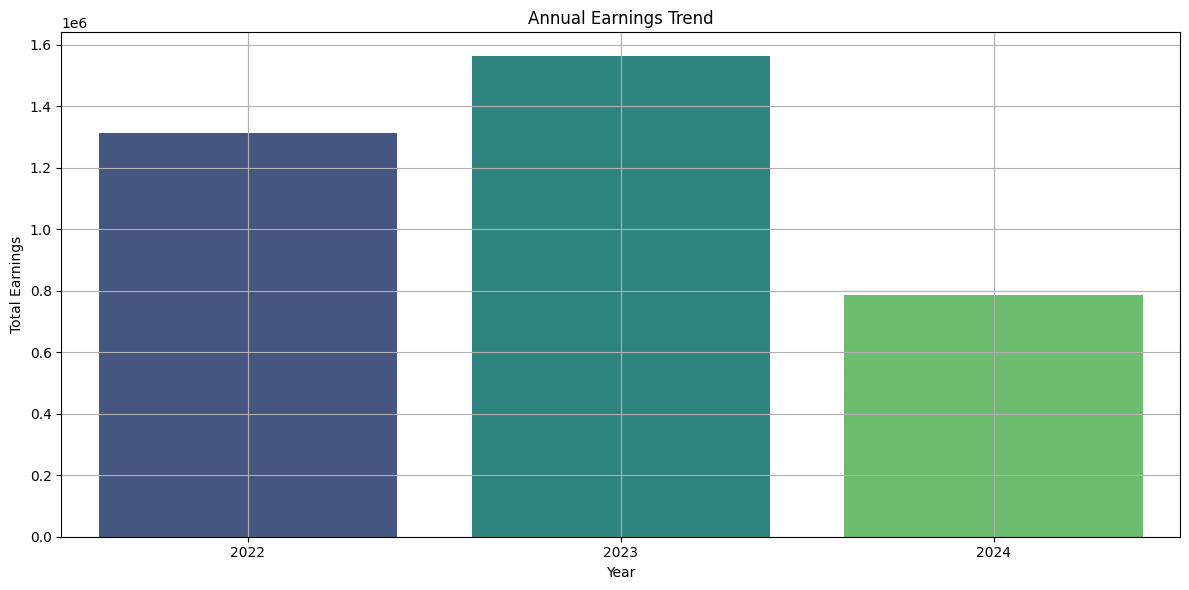

In [10]:
# Annual Revenue Chart
annual_earnings = df_all_weeks.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=annual_earnings, x='Year', y='Total', palette='viridis')
plt.title('Annual Earnings Trend')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.grid(True)
plt.tight_layout()
plt.show()

The 'Annual Earnings Trend' graph compares earnings across 2022, 2023, and 2024. Although an upward trend is noted from 2022 to 2023, there is a decline in 2024. This should be interpreted with caution, as data for 2022 excludes the first quarter, and 2024 only includes partial data. These contextual details are crucial for accurate trend analysis.

In [11]:
# Comparing Earnings Growth Year-Over-Year
earnings_growth = annual_earnings['Total'].pct_change() * 100
annual_earnings['Growth (%)'] = earnings_growth
print("Year-over-Year Earnings Growth:\n", annual_earnings)

Year-over-Year Earnings Growth:
    Year         Total  Growth (%)
0  2022  1.312941e+06         NaN
1  2023  1.562511e+06   19.008434
2  2024  7.868458e+05  -49.642214


This year-over-year analysis highlights the percentage growth or decline in earnings, offering a clearer view of the business's performance over time. Such insights are critical for understanding whether the business is expanding or contracting and can guide long-term strategic planning.

# Exporting Results

In [12]:
# Saving the Results to a CSV File for Use in Tableau
df_all_weeks.to_csv('income_analysis.csv', index=False)

# Conclusion

In conclusion, while these graphs provide valuable insights into earnings trends, it is crucial to account for external factors such as missing or incomplete data. The variability seen in the monthly and weekly trends highlights the importance of considering operational specifics and high-earning events in the analysis.

Moving forward, further analysis could involve a more granular breakdown of earnings by day of the week or hour of the day, particularly focusing on peak times. Additionally, comparing these trends against industry benchmarks could provide valuable context and highlight areas for potential improvement or strategic shifts.

By incorporating these additional analyses, the restaurant can gain a more nuanced understanding of its performance, enabling better decision-making and more targeted strategies to enhance profitability. The potential for this analysis to scale is significant, and further refinement could include real-time data integration for more dynamic and responsive business insights.